In [31]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from collections import Counter

In [2]:
raw_data = pd.read_csv('Companies-House-search-results-sparkies.csv')

In [3]:
data = raw_data.copy()
data

,company_name,company_number,company_status,company_type,company_subtype,dissolution_date,incorporation_date,removed_date,registered_date,nature_of_business,registered_office_address
0,ALEXANDER ZANE PROJECTS LTD,06995078,Active,Private limited company,NaN,NaN,2009-08-19,NaN,NaN,41100 43210,Paxton Lodge London Road Coventry CV1 2JT
1,EPG SPECIALISTS LTD,07244642,Active,Private limited company,NaN,NaN,2010-05-06,NaN,NaN,35230 43210 43220 43290,Unit 64- 101 Clapham High Street London SW4 7TB
2,DOLFIN ELECTRICALS LTD,07154290,Active,Private limited company,NaN,NaN,2010-02-11,NaN,NaN,43210,77 Lullingstone Lane London SE13 6UH England
3,JB ELECTRIX LTD,07604751,Active,Private limited company,NaN,NaN,2011-04-14,NaN,NaN,43210 43999,41 Riverside London NW4 3TU
4,FOREVER ELECTRICAL INSTALLATION AND BUILDING S...,06611720,Active,Private limited company,NaN,NaN,2008-06-04,NaN,NaN,43210,85 Great Portland Street Firet Floor London W1...
...,...,...,...,...,...,...,...,...,...,...,...
1116,LA LUNE LIGHTING LTD,08808500,Active,Private limited company,NaN,NaN,2013-12-10,NaN,NaN,43210,50 St Marys Crescent London NW4 4LH
1117,WALTER MILES (ELECTRICAL ENGINEERS) LIMITED,00531815,Active,Private limited company,NaN,NaN,1954-04-06,NaN,NaN,43210,Christopher House 94b London Road Leicester LE...
1118,SUPREME GALAXY ELECTRICAL CONSTRUCTION LIMITED,06519002,Active,Private limited company,NaN,NaN,2008-02-29,NaN,NaN,43210 71122,Flat 41 Prospect House Gaywood Street London S...
1119,CREWLINK LIMITED,04139054,Active,Private limited company,NaN,NaN,2001-01-11,NaN,NaN,43210,4th Floor 4 Tabernacle Street London EC2A 4LU ...


In [4]:
pickle_data = pd.read_pickle("appointments.pkl")
pickle_data

,Company Number,Appointment Type,Appointment Date,Resignation Date,Partial Date of Birth,Company Status,Company Name,Person Name,Current Age,Current Tenure,Time Since Leaving,Total Tenure
0,6,0,2016-09-13,NaN,NaT,D,MARINE AND GENERAL MUTUAL LIFE ASSURANCE SOCIETY,MR MARTIN PRINGLE,NaN,8.0,NaN,NaN
1,6,1,2015-03-01,NaN,1963-03-01,D,MARINE AND GENERAL MUTUAL LIFE ASSURANCE SOCIETY,MR JAMES GALBRAITH,61.0,9.0,NaN,NaN
2,6,1,2015-06-01,NaN,1952-10-01,D,MARINE AND GENERAL MUTUAL LIFE ASSURANCE SOCIETY,MR MICHAEL JOHN WALKER,72.0,9.0,NaN,NaN
3,58,0,1992-01-26,NaN,NaT,D,RAILWAY PASSENGERS ASSURANCE COMPANY,AVIVA COMPANY SECRETARIAL SERVICES LIMITED,NaN,32.0,NaN,NaN
4,58,1,2004-09-24,NaN,1963-03-01,D,RAILWAY PASSENGERS ASSURANCE COMPANY,STUART ALAN ROPER MEAD,61.0,20.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
26099735,ZC000205,1,2001-06-30,NaN,1958-12-01,A,THE FELIXSTOWE DOCK AND RAILWAY COMPANY,MR CLEMENCE CHUN FUN CHENG,66.0,23.0,NaN,NaN
26099736,ZC000205,1,2014-01-01,NaN,1953-08-01,A,THE FELIXSTOWE DOCK AND RAILWAY COMPANY,SING CHI IP,71.0,10.0,NaN,NaN
26099737,ZC000205,1,2019-12-27,NaN,1973-01-01,A,THE FELIXSTOWE DOCK AND RAILWAY COMPANY,MR ANDREW STEVEN LAWRENCE,51.0,4.0,NaN,NaN
26099738,ZC000205,1,2019-12-27,NaN,1964-07-01,A,THE FELIXSTOWE DOCK AND RAILWAY COMPANY,MR SIMON RICHARD MULLETT,60.0,4.0,NaN,NaN


In [5]:
pickle_data['company_number'] = pd.to_numeric(pickle_data['Company Number'], errors='coerce')
data['company_number'] = pd.to_numeric(data['company_number'], errors='coerce')

In [6]:
sparkies = pd.merge(data, pickle_data, on='company_number')
sparkies

,company_name,company_number,company_status,company_type,company_subtype,dissolution_date,incorporation_date,removed_date,registered_date,nature_of_business,...,Appointment Date,Resignation Date,Partial Date of Birth,Company Status,Company Name,Person Name,Current Age,Current Tenure,Time Since Leaving,Total Tenure
0,ALEXANDER ZANE PROJECTS LTD,6995078.0,Active,Private limited company,NaN,NaN,2009-08-19,NaN,NaN,41100 43210,...,2009-08-19,NaN,1986-12-01,A,ALEXANDER ZANE PROJECTS LTD,MR DEMETRI KOURSARIS,38.0,15.0,NaN,NaN
1,EPG SPECIALISTS LTD,7244642.0,Active,Private limited company,NaN,NaN,2010-05-06,NaN,NaN,35230 43210 43220 43290,...,2010-05-06,NaN,1975-02-01,A,EPG SPECIALISTS LTD,MR DARREN APPEL,49.0,14.0,NaN,NaN
2,DOLFIN ELECTRICALS LTD,7154290.0,Active,Private limited company,NaN,NaN,2010-02-11,NaN,NaN,43210,...,2010-02-11,NaN,1974-11-01,A,DOLFIN ELECTRICALS LTD,MR VICTOR MWANGI,50.0,14.0,NaN,NaN
3,JB ELECTRIX LTD,7604751.0,Active,Private limited company,NaN,NaN,2011-04-14,NaN,NaN,43210 43999,...,2011-04-14,NaN,1980-04-01,A,JB ELECTRIX LTD,MR JAROSLAW BOGUSLAW,44.0,13.0,NaN,NaN
4,FOREVER ELECTRICAL INSTALLATION AND BUILDING S...,6611720.0,Active,Private limited company,NaN,NaN,2008-06-04,NaN,NaN,43210,...,2008-06-04,NaN,1978-01-01,A,FOREVER ELECTRICAL INSTALLATION AND BUILDING S...,MR AMMAR BARAZANJIE,46.0,16.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573404,WALTER MILES (ELECTRICAL ENGINEERS) LIMITED,531815.0,Active,Private limited company,NaN,NaN,1954-04-06,NaN,NaN,43210,...,2011-12-01,NaN,1976-05-01,A,WALTER MILES (ELECTRICAL ENGINEERS) LIMITED,MR MICHAEL RICHARD HARRISON,48.0,13.0,NaN,NaN
573405,WALTER MILES (ELECTRICAL ENGINEERS) LIMITED,531815.0,Active,Private limited company,NaN,NaN,1954-04-06,NaN,NaN,43210,...,2019-06-26,NaN,1971-11-01,A,WALTER MILES (ELECTRICAL ENGINEERS) LIMITED,MR KEVIN PARR,53.0,5.0,NaN,NaN
573406,SUPREME GALAXY ELECTRICAL CONSTRUCTION LIMITED,6519002.0,Active,Private limited company,NaN,NaN,2008-02-29,NaN,NaN,43210 71122,...,2012-04-01,NaN,1966-02-01,A,SUPREME GALAXY ELECTRICAL CONSTRUCTION LIMITED,MR CHARLES GERALD,58.0,12.0,NaN,NaN
573407,CREWLINK LIMITED,4139054.0,Active,Private limited company,NaN,NaN,2001-01-11,NaN,NaN,43210,...,2001-01-16,NaN,1951-03-01,A,CREWLINK LIMITED,LESLIE JOHN ROTHWELL,73.0,23.0,NaN,NaN


In [9]:
sparkies.columns

Index(['company_name', 'company_number', 'company_status', 'company_type',
       'company_subtype', 'dissolution_date', 'incorporation_date',
       'removed_date', 'registered_date', 'nature_of_business',
       'registered_office_address', 'Company Number', 'Appointment Type',
       'Appointment Date', 'Resignation Date', 'Partial Date of Birth',
       'Company Status', 'Company Name', 'Person Name', 'Current Age',
       'Current Tenure', 'Time Since Leaving', 'Total Tenure'],
      dtype='object')

In [7]:
sparkies = sparkies[sparkies['Company Status'] == 'A']
sparkies.nunique()

company_name                   1118
company_number                 1117
company_status                    1
company_type                      2
company_subtype                   0
dissolution_date                  0
incorporation_date              958
removed_date                      0
registered_date                   0
nature_of_business              167
registered_office_address       895
Company Number                61784
Appointment Type                  5
Appointment Date               9578
Resignation Date                  0
Partial Date of Birth          1226
Company Status                    1
Company Name                  61782
Person Name                  206977
Current Age                     120
Current Tenure                   75
Time Since Leaving                0
Total Tenure                      0
dtype: int64

In [15]:
sparkies[['company_name','Person Name']].groupby('company_name').count().sort_values('Person Name', ascending=False)

,Person Name
company_name,
SCOTIA POWER LTD,257907
GRATTE BROTHERS LIMITED,12
GRATTE BROTHERS GROUP LIMITED,9
RELAY ENGINEERING LIMITED,9
EAST WEST CONNECT LIMITED,9
...,...
A-Z ELECTRICAL & HEATING LIMITED,1
A W ELECTRICAL LIMITED,1
A J O ELECTRICAL SERVICES LIMITED,1


In [ ]:
sparkies[sparkies['Current Tenure'] > sparkies['Current Age']]

,company_name,company_number,company_status,company_type,company_subtype,dissolution_date,incorporation_date,removed_date,registered_date,nature_of_business,...,Appointment Date,Resignation Date,Partial Date of Birth,Company Status,Company Name,Person Name,Current Age,Current Tenure,Time Since Leaving,Total Tenure
54611,SCOTIA POWER LTD,NaN,Active,Private limited company,NaN,NaN,2010-02-26,NaN,NaN,43210,...,2002-07-09,NaN,2004-02-01,A,GLAXO WELLCOME INVESTMENTS B.V.,EDINBURGH PHARMACEUTICAL INDUSTRIES LIMITED,20.0,22.0,NaN,NaN
54614,SCOTIA POWER LTD,NaN,Active,Private limited company,NaN,NaN,2010-02-26,NaN,NaN,43210,...,2002-07-09,NaN,2004-02-01,A,GLAXO WELLCOME INTERNATIONAL B.V.,EDINBURGH PHARMACEUTICAL INDUSTRIES LIMITED,20.0,22.0,NaN,NaN
62570,SCOTIA POWER LTD,NaN,Active,Private limited company,NaN,NaN,2010-02-26,NaN,NaN,43210,...,1941-08-15,NaN,1950-01-01,A,KEENBARK PTY. LTD.,IAN RUSSELL,74.0,83.0,NaN,NaN
96022,SCOTIA POWER LTD,NaN,Active,Private limited company,NaN,NaN,2010-02-26,NaN,NaN,43210,...,2020-03-17,NaN,2024-03-01,A,SHORELINE AS,MICHAEL FRIS BJERRUM,0.0,4.0,NaN,NaN


In [18]:
sparkies = sparkies[sparkies['company_name'] != 'SCOTIA POWER LTD']

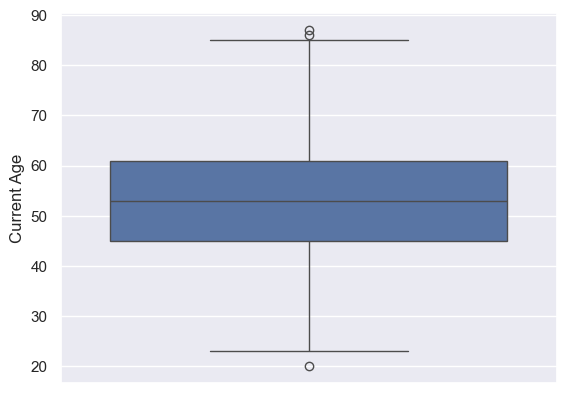

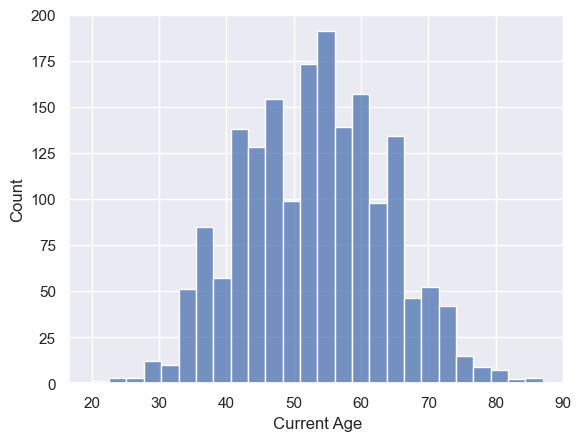

In [19]:
sns.boxplot(sparkies['Current Age'])
plt.show()
sns.histplot(sparkies['Current Age'])
plt.show()

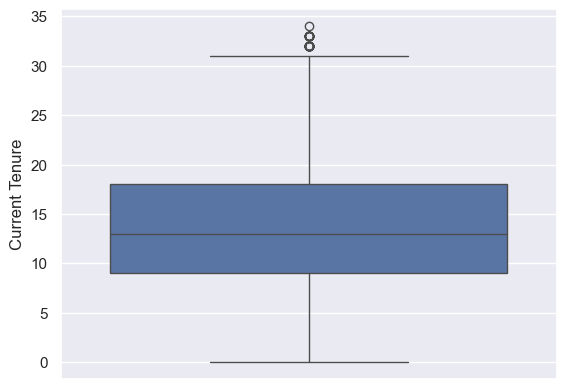

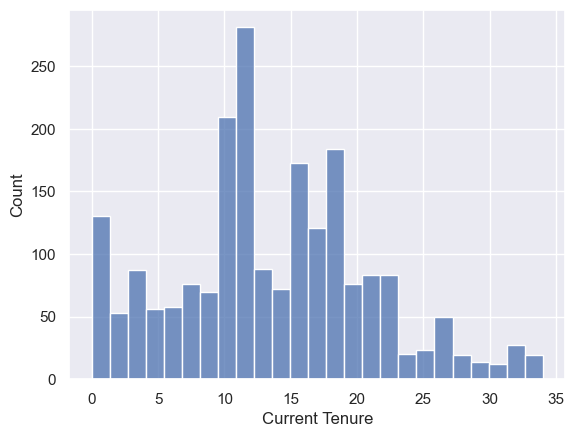

In [20]:
sns.boxplot(sparkies['Current Tenure'])
plt.show()
sns.histplot(sparkies['Current Tenure'])
plt.show()

In [27]:
set(ref for row in sparkies['nature_of_business'] for ref in row.split())

{'01490',
 '18129',
 '25110',
 '25990',
 '26301',
 '27900',
 '33120',
 '33130',
 '33140',
 '33160',
 '33170',
 '33190',
 '33200',
 '35110',
 '35140',
 '35230',
 '35300',
 '41100',
 '41201',
 '41202',
 '42120',
 '42220',
 '42990',
 '43120',
 '43210',
 '43220',
 '43290',
 '43310',
 '43320',
 '43330',
 '43341',
 '43342',
 '43390',
 '43910',
 '43999',
 '45112',
 '45200',
 '45310',
 '45320',
 '46180',
 '46190',
 '46439',
 '46620',
 '46650',
 '46900',
 '47190',
 '47290',
 '47429',
 '47430',
 '47540',
 '47599',
 '47910',
 '47990',
 '49390',
 '49410',
 '49420',
 '51102',
 '52230',
 '55900',
 '59112',
 '59113',
 '61900',
 '62011',
 '62012',
 '62020',
 '62090',
 '64999',
 '68100',
 '68209',
 '68310',
 '68320',
 '70229',
 '71111',
 '71112',
 '71121',
 '71122',
 '71129',
 '71200',
 '74100',
 '74909',
 '78109',
 '80100',
 '80200',
 '81100',
 '81221',
 '81222',
 '81300',
 '82110',
 '82990',
 '84240',
 '84250',
 '85530',
 '85590',
 '85600',
 '90020',
 '90030',
 '95110',
 '95220',
 '96090'}

In [32]:
ref_counts = Counter(ref for row in sparkies['nature_of_business'] for ref in row.split())
ref_counts.most_common()

[('43210', 2084),
 ('43220', 271),
 ('43290', 104),
 ('43390', 86),
 ('43999', 55),
 ('41202', 32),
 ('46180', 32),
 ('41100', 30),
 ('43341', 28),
 ('80200', 26),
 ('41201', 25),
 ('43320', 24),
 ('43330', 18),
 ('82990', 18),
 ('33140', 16),
 ('68209', 15),
 ('43310', 15),
 ('70229', 14),
 ('33200', 14),
 ('81100', 13),
 ('96090', 12),
 ('46900', 12),
 ('42990', 11),
 ('74100', 11),
 ('62020', 10),
 ('68100', 10),
 ('25110', 9),
 ('43120', 8),
 ('47540', 8),
 ('68320', 7),
 ('71122', 7),
 ('33120', 7),
 ('62090', 6),
 ('46190', 6),
 ('35300', 6),
 ('85590', 5),
 ('35110', 5),
 ('71111', 5),
 ('71129', 5),
 ('47430', 4),
 ('74909', 4),
 ('33190', 4),
 ('85600', 4),
 ('64999', 4),
 ('27900', 4),
 ('84250', 4),
 ('42120', 4),
 ('46620', 3),
 ('62012', 3),
 ('47190', 3),
 ('61900', 3),
 ('47290', 3),
 ('47599', 3),
 ('46650', 3),
 ('49420', 3),
 ('33170', 3),
 ('52230', 3),
 ('25990', 3),
 ('68310', 3),
 ('81222', 2),
 ('71200', 2),
 ('55900', 2),
 ('62011', 2),
 ('51102', 2),
 ('43342',